In [390]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import tree
from sklearn.inspection import permutation_importance


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
font = {'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

In [211]:
df = pd.read_csv('Dataset For Modeling w Death Count Only.csv')

In [212]:
X = df.drop(['Unnamed: 0','Deaths', 'Crude Rate', 'Year', 'County', 'State','Percent of adults with less than a high school diploma, 2000','Percent of adults with a high school diploma only, 2000', "Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000", 'Percent of adults with less than a high school diploma, 2014-18','Percent of adults with a high school diploma only, 2014-18', "Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18", 'Education Year'], axis = 1)
y = df['Crude Rate']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 999)


In [213]:
X

,Population,% Gun Ownership,Poverty %,# of Gun Laws,total_high_risk,total_dealer,total_ammo_regs,total_buyer,total_open_carry,total_background_checks,...,total_child_access_prev,total_preemption,total_immunity,total_domestic_violence,2013 Urbanization_Large Fringe Metro,2013 Urbanization_Medium Metro,2013 Urbanization_Micropolitan (Nonmetro),2013 Urbanization_NonCore (Nonmetro),2013 Urbanization_Small Metro,Education Score
0,55267,0.513,0.149,11.0,1.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,1,0,0,0,2.416
1,186717,0.513,0.134,11.0,1.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,1,2.575
2,57677,0.513,0.149,11.0,1.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0,0,0,0,2.144
3,117797,0.513,0.209,11.0,1.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,1,2.305
4,80536,0.513,0.182,11.0,1.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,1,0,0,2.207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,166994,0.431,0.120,26.0,5.0,0.0,0.0,2.0,2.0,0.0,...,2.0,0.0,1.0,6.0,0,0,0,0,1,2.580
5079,46133,0.572,0.068,12.0,1.0,0.0,0.0,2.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0,0,1,0,0,2.570
5080,91738,0.572,0.120,12.0,1.0,0.0,0.0,2.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,1,2.751
5081,75450,0.572,0.103,12.0,1.0,0.0,0.0,2.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,1,2.657


In [214]:
y_train.describe()

count    3812.000000
mean       14.462378
std         7.882060
min         1.109108
25%         9.224441
50%        12.988700
75%        18.164043
max       113.649278
Name: Crude Rate, dtype: float64

In [415]:
mean_crude_rate = np.mean(y_train)
fhat = lambda X: np.ones(len(X)) * mean_crude_rate
yhat_base_model = fhat(X_test)
print(mean_crude_rate)
mean_squared_error(y_test, yhat_base_model)

14.462377791102567


59.26564310732302

In [216]:
lin_reg = LinearRegression()

kf = KFold(n_splits=10, shuffle=True, random_state = 999)
mses = []

for train, test in kf.split(X):
    lin_reg.fit(X.values[train], y.values[train])
    yhat = lin_reg.predict(X.values[test])
    mses.append(mean_squared_error(y.values[test], yhat))
    
print(np.mean(mses))
mses

31.438913024810308


[26.85851350068521,
 37.794735112453246,
 27.44972782490464,
 31.173721189831912,
 31.86419657268855,
 27.686098792079637,
 43.81979298075731,
 24.758717106636393,
 30.985918932003276,
 31.997708236062845]

In [217]:
def mse(model, X, y):
    preds = model.predict(X)
    n = X.shape[0]
    return np.square(np.subtract(y,preds)).mean()

def train_and_test_error(regressions, X_train, y_train, X_test, y_test):
    alphas = [ridge.alpha for ridge in regressions]
    train_scores = [mse(reg, X_train, y_train) for reg in regressions]
    test_scores  = [mse(reg, X_test, y_test)   for reg in regressions]
    return pd.DataFrame({
        'train_scores': train_scores,
        'test_scores' : test_scores,
    }, index=alphas)

def plot_solution_paths(ax, regressions):
    alphas = [np.log10(ridge.alpha) for ridge in regressions]
    ## all features
    coeffs = np.concatenate([ridge.coef_.reshape(1, -1) 
                             for ridge in regressions])
    for idx in range(coeffs.shape[1]):
        ax.plot(alphas, coeffs[:, idx])
    ax.set_xlabel(r"$\log_{10}(\alpha)$")
    ax.set_ylabel("Estiamted Coefficient")
    ax.set_title("Coefficient Paths")
    
def get_optimal_alpha(train_and_test_errors):
    test_errors = train_and_test_errors["test_scores"]
    optimal_idx = np.argmin(test_errors.values)
    return train_and_test_errors.index[optimal_idx]

def plot_train_and_test_error(ax, train_and_test_errors, 
                              alpha=1.0, linewidth=2, legend=True):
    alphas = train_and_test_errors.index
    optimal_alpha = get_optimal_alpha(train_and_test_errors)
    ax.plot(np.log10(alphas), train_and_test_errors.train_scores,
            label="Train MSE",
            color="blue", 
            linewidth=linewidth, alpha=alpha)
    ax.plot(np.log10(alphas), train_and_test_errors.test_scores, 
            label="Test MSE",
            color="red", 
            linewidth=linewidth, alpha=alpha)
    ax.axvline(x=np.log10(optimal_alpha), color="grey", alpha=alpha)
    ax.set_xlabel(r"$\log_{10}(\alpha)$")
    ax.set_ylabel("Mean Squared Error")
    ax.set_title("Mean Squared Error vs Regularization Strength")
    if legend:
        ax.legend()

In [234]:
n_folds = 10

cv_models = []
errors = []
splitter = KFold(n_splits=n_folds)
ridge_regularization_strengths = np.logspace(np.log10(10**(-6)), np.log10(10**4), num=100)

X = df.drop(['Unnamed: 0','Deaths', 'Crude Rate', 'Year', 'County', 'State','Percent of adults with less than a high school diploma, 2000','Percent of adults with a high school diploma only, 2000', "Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000", 'Percent of adults with less than a high school diploma, 2014-18','Percent of adults with a high school diploma only, 2014-18', "Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18", 'Education Year'], axis = 1)
y = df['Crude Rate']

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

for train_idxs, test_idxs in splitter.split(df):
    # Split the raw data into train and test
    X_train, X_test, y_train, y_test = X.iloc[train_idxs], X.iloc[test_idxs], y.iloc[train_idxs], y.iloc[test_idxs]
    
#     # Fit and transform the raw data.
#     # All training of the transformers must only touch the training data!
#     balance_pipeline.fit(train_raw)
#     balance_train_cv = balance_pipeline.transform(train_raw)
#     balance_test_cv  = balance_pipeline.transform(test_raw)
#     y_train_cv, y_test_cv = standardize_y(train_raw["Balance"], test_raw["Balance"])
    
    # Fit all the models at different regularization strengths
    ridge_regressions = []
    for alpha in ridge_regularization_strengths:
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)
        ridge_regressions.append(ridge)
    cv_models.append(ridge_regressions)
    
    # Calculate the error curves for each CV fold, for each regularization strength
    train_and_test_errors = train_and_test_error(ridge_regressions, X_train, y_train, X_test, y_test)
    errors.append(train_and_test_errors)
    
    # Calculate the mean errors across all CV folds, for each regularization strength
    train_errors = np.empty(shape=(n_folds, len(ridge_regularization_strengths)))
    for idx, tte in enumerate(errors):
        te = tte['train_scores']
        train_errors[idx, :] = te
    mean_train_errors = np.mean(train_errors, axis=0)
    
    test_errors = np.empty(shape=(n_folds, len(ridge_regularization_strengths)))
    for idx, tte in enumerate(errors):
        te = tte['test_scores']
        test_errors[idx, :] = te
    mean_test_errors = np.mean(test_errors, axis=0)
    
    mean_errors = pd.DataFrame({
        'train_scores': mean_train_errors,
        'test_scores' : mean_test_errors,
    }, index=ridge_regularization_strengths)

/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.04473e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.62809e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.62567e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.21466e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.53276e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/a

/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.08034e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.67314e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.68216e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.22178e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.54172e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/a

/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.05042e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.63465e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.63336e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.21558e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.53386e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/a

/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.62865e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.10259e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.96246e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.13096e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.42712e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/a

/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.15975e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.77267e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.80785e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.23761e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56168e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/a

/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.0501e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.63416e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.63295e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.21556e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.53383e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/an

/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.67849e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.16553e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.04183e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.14095e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.43973e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/a

/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.08718e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.68168e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.69345e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.22324e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.54359e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/a

/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.01555e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.59083e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.57848e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.20866e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.52517e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/a

/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.65251e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.13285e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.00096e-22): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.13582e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.43324e-21): result may not be accurate.
  overwrite_a=True).T
/Users/mm/opt/a

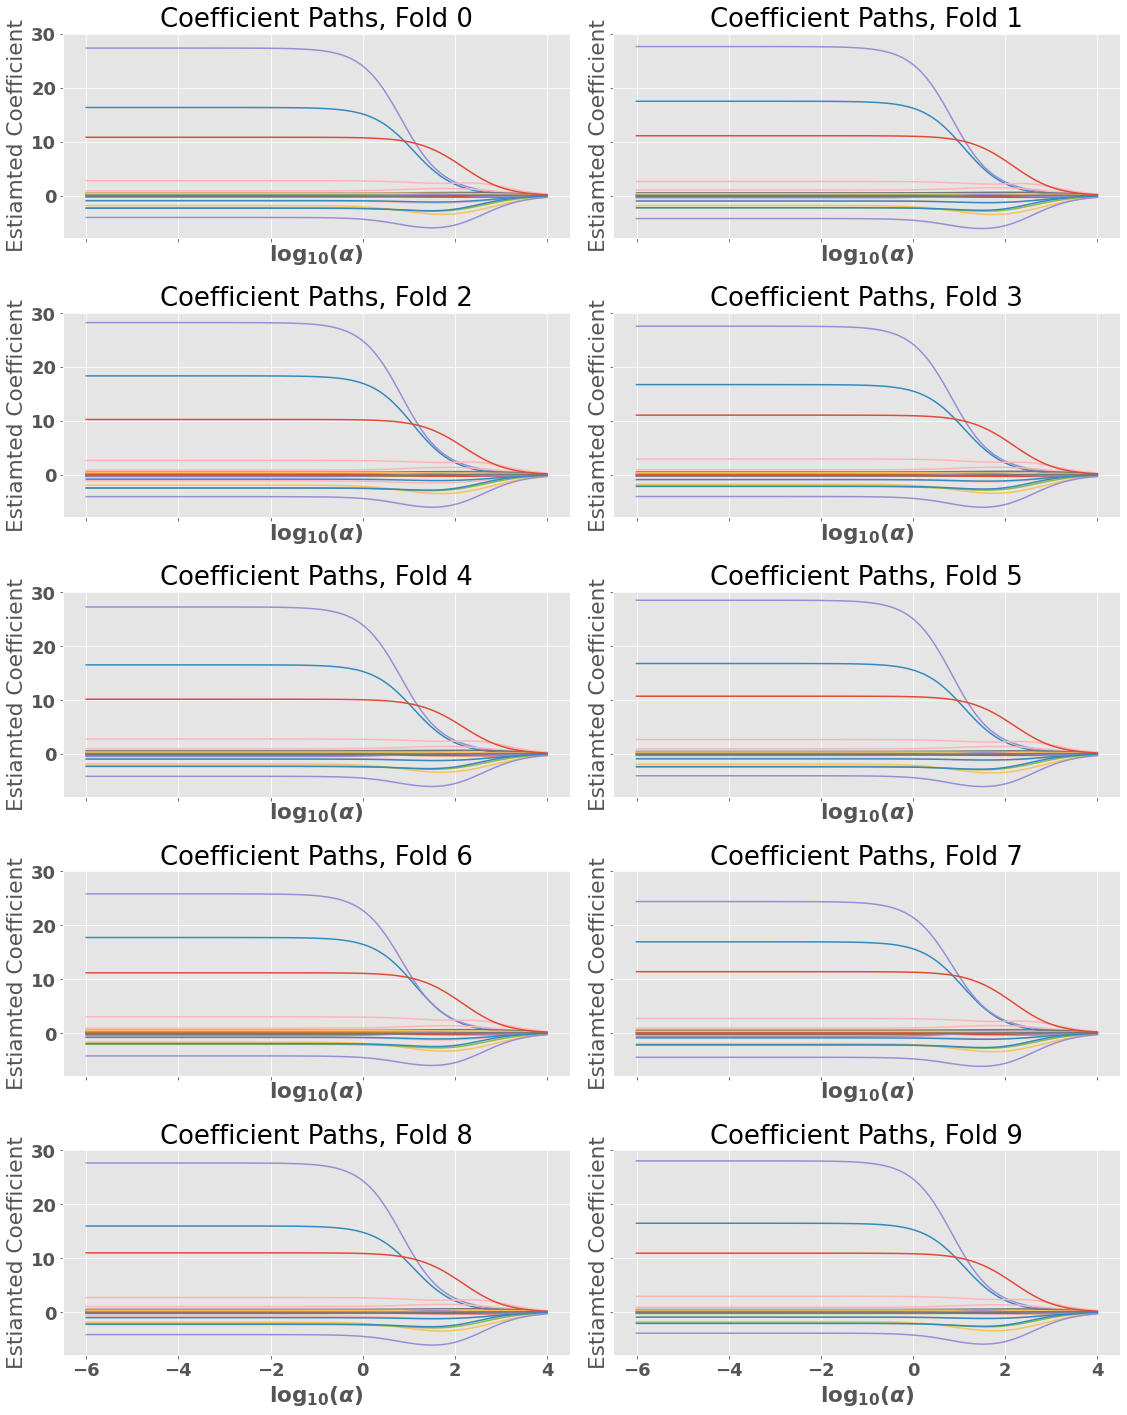

In [237]:
fig, axs = plt.subplots(5, 2, figsize=(16, 20), 
                        sharex=True, sharey=True)

for idx, ax in enumerate(axs.flatten()):
    plot_solution_paths(ax, cv_models[idx])
    ax.set_title("Coefficient Paths, Fold {}".format(idx))
fig.tight_layout()

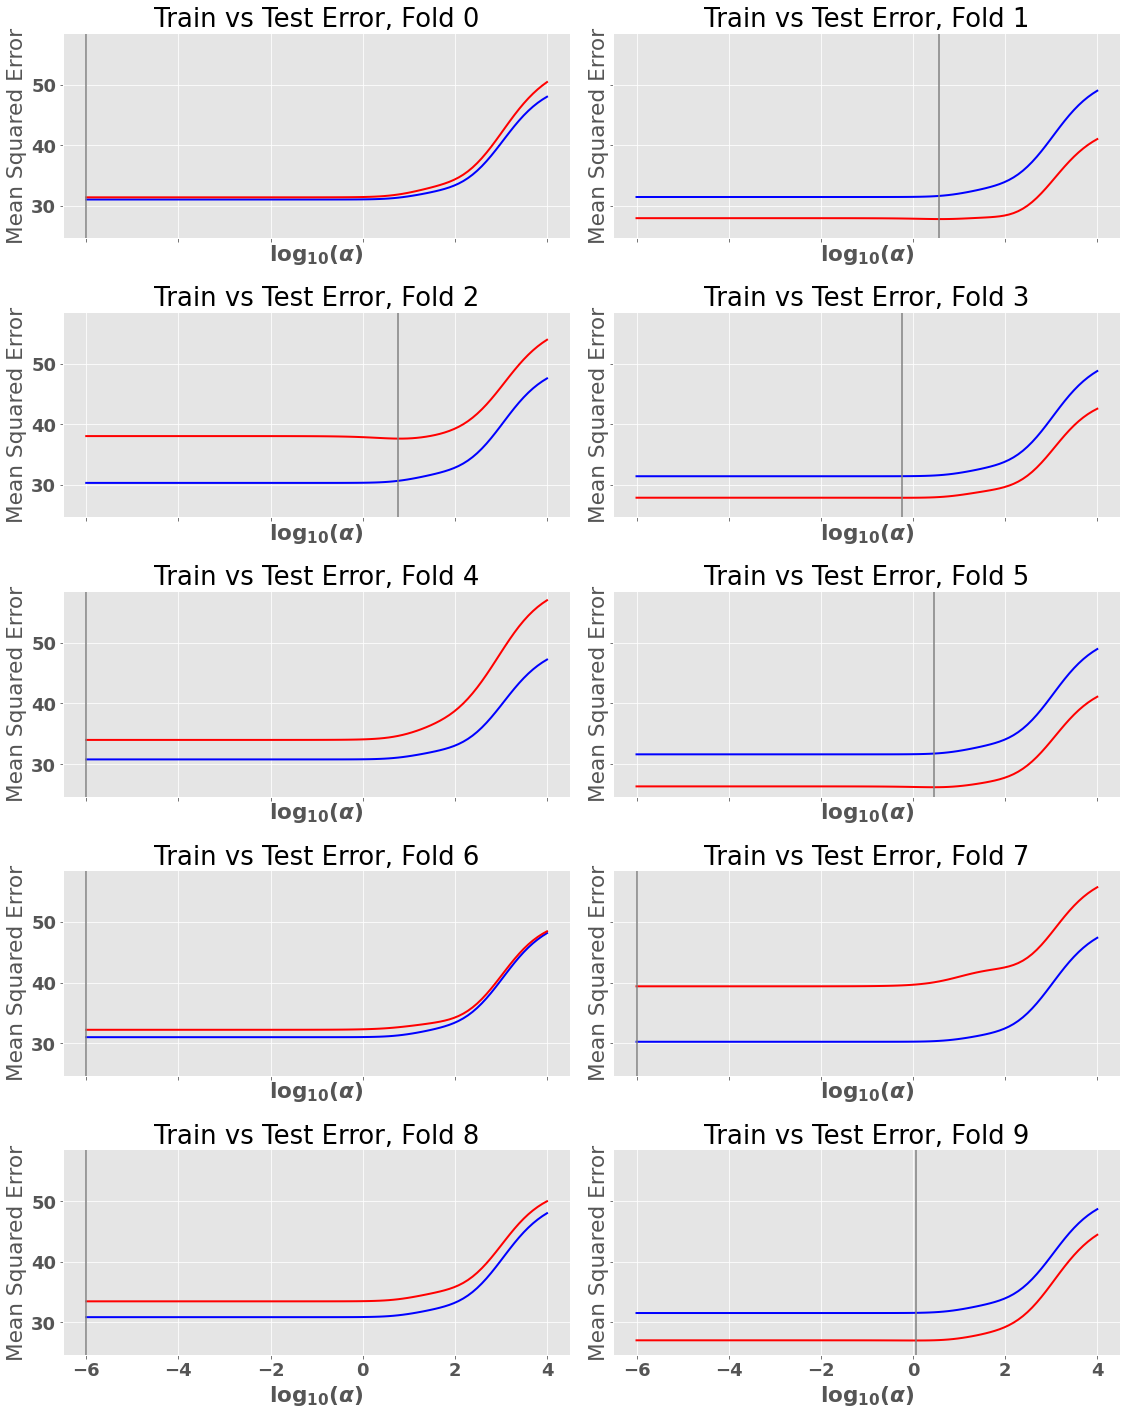

In [238]:
fig, axs = plt.subplots(5, 2, figsize=(16, 20), 
                        sharex=True, sharey=True)

for idx, (ax, ttes) in enumerate(zip(axs.flatten(), errors)):
    ## question: could you tell which color indicates training error?
    ##           how?
    plot_train_and_test_error(ax, ttes, legend=False)
    ax.set_title("Train vs Test Error, Fold {}".format(idx))
fig.tight_layout()

In [239]:
mean_errors.iloc[np.argmin(mean_errors['test_scores'])]

train_scores    31.029028
test_scores     31.771943
Name: 0.1788649529057435, dtype: float64

In [176]:
np.logspace(np.log10(10**(-6)), np.log10(10**4), num=100)

array([1.00000000e-06, 1.26185688e-06, 1.59228279e-06, 2.00923300e-06,
       2.53536449e-06, 3.19926714e-06, 4.03701726e-06, 5.09413801e-06,
       6.42807312e-06, 8.11130831e-06, 1.02353102e-05, 1.29154967e-05,
       1.62975083e-05, 2.05651231e-05, 2.59502421e-05, 3.27454916e-05,
       4.13201240e-05, 5.21400829e-05, 6.57933225e-05, 8.30217568e-05,
       1.04761575e-04, 1.32194115e-04, 1.66810054e-04, 2.10490414e-04,
       2.65608778e-04, 3.35160265e-04, 4.22924287e-04, 5.33669923e-04,
       6.73415066e-04, 8.49753436e-04, 1.07226722e-03, 1.35304777e-03,
       1.70735265e-03, 2.15443469e-03, 2.71858824e-03, 3.43046929e-03,
       4.32876128e-03, 5.46227722e-03, 6.89261210e-03, 8.69749003e-03,
       1.09749877e-02, 1.38488637e-02, 1.74752840e-02, 2.20513074e-02,
       2.78255940e-02, 3.51119173e-02, 4.43062146e-02, 5.59081018e-02,
       7.05480231e-02, 8.90215085e-02, 1.12332403e-01, 1.41747416e-01,
       1.78864953e-01, 2.25701972e-01, 2.84803587e-01, 3.59381366e-01,
      

In [241]:
X = df.drop(['Unnamed: 0','Deaths', 'Crude Rate', 'Year', 'County', 'State','Percent of adults with less than a high school diploma, 2000','Percent of adults with a high school diploma only, 2000', "Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000", 'Percent of adults with less than a high school diploma, 2014-18','Percent of adults with a high school diploma only, 2014-18', "Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18", 'Education Year'], axis = 1)
y = df['Crude Rate']
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, random_state = 999)

ridge = Ridge(alpha=0.1788649529057435)
ridge.fit(X_train, y_train)
yhat = ridge.predict(X_test)
mean_squared_error(y_test, yhat)

30.07678243861712

In [288]:
ridge.coef_.shape

(24,)

In [299]:
coefs = np.array([np.array(X.columns).reshape(24,),ridge.coef_.reshape(24,)])
# coefs = np.vstack((np.array(X.columns).reshape(1,), ridge.coef_.reshape(24,1)))
coefs.shape

(2, 24)

In [300]:
coefs

array([['Population', '% Gun Ownership', 'Poverty %', '# of Gun Laws',
        'total_high_risk', 'total_dealer', 'total_ammo_regs',
        'total_buyer', 'total_open_carry', 'total_background_checks',
        'total_assault_large_mags', 'total_gun_trafficking',
        'total_concealed_carry', 'total_syg', 'total_child_access_prev',
        'total_preemption', 'total_immunity', 'total_domestic_violence',
        '2013 Urbanization_Large Fringe Metro',
        '2013 Urbanization_Medium Metro',
        '2013 Urbanization_Micropolitan (Nonmetro)',
        '2013 Urbanization_NonCore (Nonmetro)',
        '2013 Urbanization_Small Metro', 'Education Score'],
       [-1.0303989751528946, 2.1114652906192455, 1.5205694146717608,
        -0.18720980861673192, 0.1232612314519667, -1.150138628946394,
        1.2010387402540816, -0.5103532499037048, 0.26948626729808806,
        1.0181814358456474, 1.032265971084796, 0.38303202419867727,
        0.044845803074325376, -0.42442229775813406, -0.112591

In [328]:
top_coefs = coefs[:,[0,1,2,5,6,9,10,17,19,21,22,23]]
top_coefs

array([['Population', '% Gun Ownership', 'Poverty %', 'total_dealer',
        'total_ammo_regs', 'total_background_checks',
        'total_assault_large_mags', 'total_domestic_violence',
        '2013 Urbanization_Medium Metro',
        '2013 Urbanization_NonCore (Nonmetro)',
        '2013 Urbanization_Small Metro', 'Education Score'],
       [-1.0303989751528946, 2.1114652906192455, 1.5205694146717608,
        -1.150138628946394, 1.2010387402540816, 1.0181814358456474,
        1.032265971084796, -1.0813171419973222, -1.1296650777252857,
        1.7692958811708475, -1.0437318764365577, -1.013026109508007]],
      dtype=object)

In [329]:
top_coefs[0,:]

array(['Population', '% Gun Ownership', 'Poverty %', 'total_dealer',
       'total_ammo_regs', 'total_background_checks',
       'total_assault_large_mags', 'total_domestic_violence',
       '2013 Urbanization_Medium Metro',
       '2013 Urbanization_NonCore (Nonmetro)',
       '2013 Urbanization_Small Metro', 'Education Score'], dtype=object)

Text(0.5, 1.0, 'Top Features - Ridge Regression')

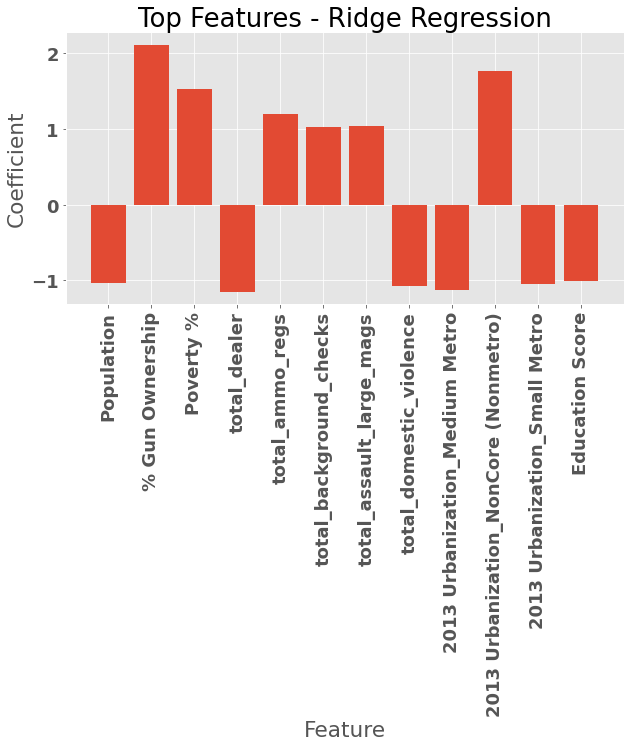

In [331]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(top_coefs[0,:], top_coefs[1,:])
plt.xticks(rotation='vertical')
ax.set_xlabel('Feature')
ax.set_ylabel('Coefficient')
ax.set_title('Top Features - Ridge Regression')

In [403]:
rf = RandomForestRegressor(n_estimators=10000,
                           max_features='auto',
                           random_state=0)

X = df.drop(['Unnamed: 0','Deaths', 'Crude Rate', 'Year', 'County', 'State','Percent of adults with less than a high school diploma, 2000','Percent of adults with a high school diploma only, 2000', "Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000", 'Percent of adults with less than a high school diploma, 2014-18','Percent of adults with a high school diploma only, 2014-18', "Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18", 'Education Year'], axis = 1)
y = df['Crude Rate']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 999)

rf.fit(X_train, y_train)
                                     
# Test Prediction
pred = rf.predict(X_test)

#you can calculate recall & precision / MSE from the predictions as normal

mean_squared_error(pred,y_test)

12.462978770692734

In [ ]:
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh');

In [370]:
X = df.drop(['Unnamed: 0','Deaths', 'Crude Rate', 'Year', 'County', 'State','Percent of adults with less than a high school diploma, 2000','Percent of adults with a high school diploma only, 2000', "Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000", 'Percent of adults with less than a high school diploma, 2014-18','Percent of adults with a high school diploma only, 2014-18', "Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18", 'Education Year'], axis = 1)
y = df['Crude Rate']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 999)

depth = np.arange(1,100)

dt_mses = []

for depth in depth:
    dt = tree.DecisionTreeRegressor(max_depth = depth)
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)
    dt_mses.append([depth, mean_squared_error(pred,y_test)])

arr = np.array(dt_mses)    
arr[np.argmin(arr[:, 1]), :]

array([ 6.        , 18.12326301])

In [371]:
X = df.drop(['Unnamed: 0','Deaths', 'Crude Rate', 'Year', 'County', 'State','Percent of adults with less than a high school diploma, 2000','Percent of adults with a high school diploma only, 2000', "Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000", 'Percent of adults with less than a high school diploma, 2014-18','Percent of adults with a high school diploma only, 2014-18', "Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18", 'Education Year'], axis = 1)
y = df['Crude Rate']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 999)

samples_split = np.arange(2,100)

dt_mses = []

for sample_split in samples_split:
    dt = tree.DecisionTreeRegressor(min_samples_split = sample_split)
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)
    dt_mses.append([sample_split, mean_squared_error(pred,y_test)])
    
arr = np.array(dt_mses)    
arr[np.argmin(arr[:, 1]), :]

array([63.        , 16.46297712])

In [372]:
X = df.drop(['Unnamed: 0','Deaths', 'Crude Rate', 'Year', 'County', 'State','Percent of adults with less than a high school diploma, 2000','Percent of adults with a high school diploma only, 2000', "Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000", 'Percent of adults with less than a high school diploma, 2014-18','Percent of adults with a high school diploma only, 2014-18', "Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18", 'Education Year'], axis = 1)
y = df['Crude Rate']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 999)

samples_leaf = np.arange(2,100)

dt_mses = []

for sample_leaf in samples_leaf:
    dt = tree.DecisionTreeRegressor(min_samples_leaf = sample_leaf)
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)
    dt_mses.append([sample_leaf, mean_squared_error(pred,y_test)])
    
arr = np.array(dt_mses)    
arr[np.argmin(arr[:, 1]), :]

array([24.        , 16.08986423])

In [373]:
X = df.drop(['Unnamed: 0','Deaths', 'Crude Rate', 'Year', 'County', 'State','Percent of adults with less than a high school diploma, 2000','Percent of adults with a high school diploma only, 2000', "Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000", 'Percent of adults with less than a high school diploma, 2014-18','Percent of adults with a high school diploma only, 2014-18', "Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18", 'Education Year'], axis = 1)
y = df['Crude Rate']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 999)

leaf_nodes = np.arange(2,100)

dt_mses = []

for leaf_node in leaf_nodes:
    dt = tree.DecisionTreeRegressor(max_leaf_nodes = leaf_node)
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)
    dt_mses.append([leaf_node, mean_squared_error(pred,y_test)])
    
arr = np.array(dt_mses)    
arr[np.argmin(arr[:, 1]), :]

array([71.        , 16.95483743])

In [408]:
X = df.drop(['Unnamed: 0','Deaths', 'Crude Rate', 'Year', 'County', 'State','Percent of adults with less than a high school diploma, 2000','Percent of adults with a high school diploma only, 2000', "Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000", 'Percent of adults with less than a high school diploma, 2014-18','Percent of adults with a high school diploma only, 2014-18', "Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18", 'Education Year'], axis = 1)
y = df['Crude Rate']
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, random_state = 999)

dt = tree.DecisionTreeRegressor(min_samples_leaf = 24, max_depth = 6, min_samples_split = 63, max_leaf_nodes = 71)
# dt = tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print(mean_squared_error(pred,y_test))
print(dt.tree_)

17.08627518895462


In [409]:
dt.feature_importances_

array([7.68175212e-01, 1.44610038e-02, 7.13949001e-02, 1.17824250e-01,
       1.18608781e-03, 1.40369131e-03, 0.00000000e+00, 7.24357354e-03,
       9.59054399e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.02347940e-04, 0.00000000e+00, 3.10579296e-03, 1.37440869e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [410]:
dt_feat_impt = np.array([np.array(X.columns).reshape(24,),dt.feature_importances_.reshape(24,)])
dt_feat_impt

array([['Population', '% Gun Ownership', 'Poverty %', '# of Gun Laws',
        'total_high_risk', 'total_dealer', 'total_ammo_regs',
        'total_buyer', 'total_open_carry', 'total_background_checks',
        'total_assault_large_mags', 'total_gun_trafficking',
        'total_concealed_carry', 'total_syg', 'total_child_access_prev',
        'total_preemption', 'total_immunity', 'total_domestic_violence',
        '2013 Urbanization_Large Fringe Metro',
        '2013 Urbanization_Medium Metro',
        '2013 Urbanization_Micropolitan (Nonmetro)',
        '2013 Urbanization_NonCore (Nonmetro)',
        '2013 Urbanization_Small Metro', 'Education Score'],
       [0.7681752115693479, 0.0144610038261096, 0.07139490012322998,
        0.1178242496010182, 0.001186087814018821, 0.0014036913059149367,
        0.0, 0.00724357353959858, 0.0009590543986206032, 0.0, 0.0, 0.0,
        0.0005023479396757786, 0.0, 0.0031057929622813796,
        0.013744086920184128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Text(0.5, 1.0, 'Decision Tree Regressor')

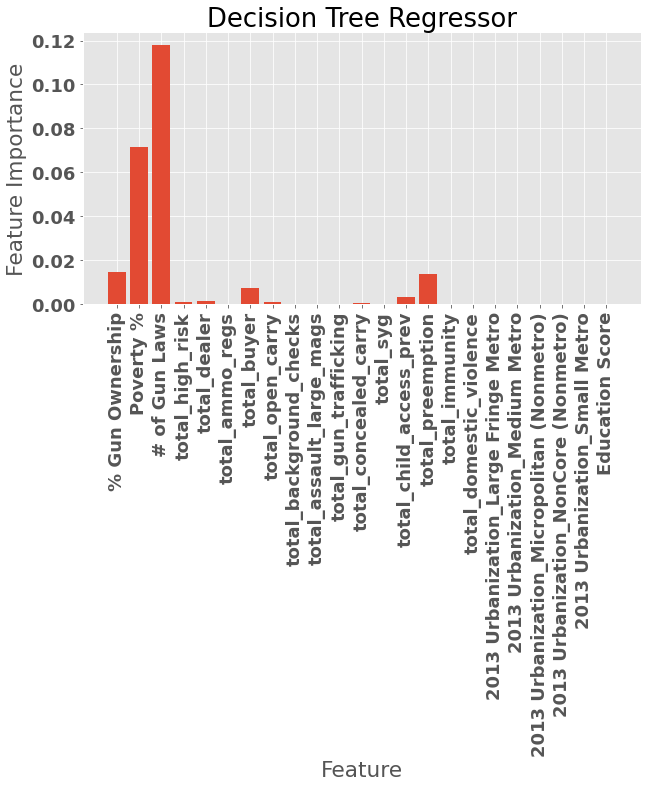

In [414]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(dt_feat_impt[0,1:], dt_feat_impt[1,1:])
plt.xticks(rotation='vertical')
ax.set_xlabel('Feature')
ax.set_ylabel('Feature Importance')
ax.set_title('Decision Tree Regressor')

In [397]:
result = permutation_importance(dt, X, y, n_repeats=10, random_state=999, scoring = 'neg_mean_squared_error')
result

{'importances_mean': array([0.        , 0.        , 0.        , 0.        , 0.18033658,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        2.43164479, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'importances_std': array([0.        , 0.        , 0.        , 0.        , 0.03496887,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07071253, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'importances': array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        